In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import otter
grader = otter.Notebook()

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

In [101]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [102]:
# Normalize the data by dividing by 255, flatten inputs, and convert datatype to float32
x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

grader.check('q1')

All tests passed!

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [104]:
# Now made a fully connected network with layers of size 300, 200, 100.
# Make a final output layer of size 10 (for each of the 10 digit classes), with a softmax activation

# Initialize model constructor
model = Sequential()

# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, \
                    input_shape=(784,)))
# Second..
model.add(Dense(200, activation=tf.nn.relu))

# Third..
model.add(Dense(100, activation=tf.nn.relu))

# Output layer with softmax..
model.add(Dense(10, activation='softmax'))

grader.check('q2')

All tests passed!

In [105]:
# compile the model with sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [106]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.2480 - accuracy: 0.9232 - val_loss: 0.1162 - val_accuracy: 0.9663
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0972 - accuracy: 0.9703 - val_loss: 0.1087 - val_accuracy: 0.9682
Epoch 3/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0667 - accuracy: 0.9804 - val_loss: 0.1172 - val_accuracy: 0.9703
Epoch 4/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.1005 - val_accuracy: 0.9741
Epoch 5/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.1071 - val_accuracy: 0.9752


In [107]:
# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = test_scores[0], test_scores[1]

print('Test accuracy:', accuracy)

grader.check('q3')

Test accuracy: 0.9771000146865845


All tests passed!

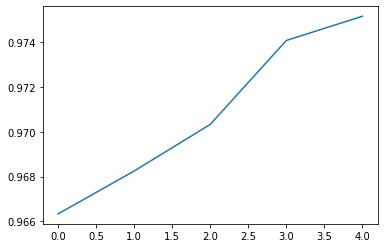

In [108]:
# plot accuracy over the epochs. Hint: look at history.history

plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

In [112]:
# Now train a CNN with 2 Conv2d layers, one pooling layer, a flattening layer, and a dense layer for the output.
# Hint: you will have to reshape your training data
# Also for the Conv2d layers, you should use data_format='channels_last'

# Import Pooling
from tensorflow.keras.layers import MaxPool2D

# Reshape training/testing data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = Sequential()

# Add layers sequentially (Conv2d layer)
model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1), data_format = 'channels_last'))

# Second.. (Conv2d layer)
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', data_format = 'channels_last'))

# Third.. (pooling layer)
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# Fourth.. (flattening layer)
model.add(Flatten())

# Fifth.. (dense layer for output)
model.add(Dense(128, activation='softmax'))

grader.check('q4')

All tests passed!

In [113]:
# compile the model

model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [114]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 88s 117ms/step - loss: 0.2016 - accuracy: 0.9392 - val_loss: 0.0719 - val_accuracy: 0.9796
Epoch 2/5
750/750 [==============================] - 93s 124ms/step - loss: 0.0607 - accuracy: 0.9826 - val_loss: 0.0573 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 89s 118ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoch 4/5
750/750 [==============================] - 83s 111ms/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.0458 - val_accuracy: 0.9872
Epoch 5/5
750/750 [==============================] - 87s 116ms/step - loss: 0.0305 - accuracy: 0.9917 - val_loss: 0.0467 - val_accuracy: 0.9865


In [115]:
# Evaluate the model
test_scores = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = test_scores[0], test_scores[1]

print('Test accuracy:', accuracy)

grader.check('q5')

Test accuracy: 0.9872999787330627


All tests passed!